## Wine Recommendation

Analizing the database of wine reviews: [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews) 


inspired by [wine-recommender](https://www.kaggle.com/sudhirnl7/wine-recommender/notebook)

### Import and read csv

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#You have to install pycountry-convert
import pycountry_convert as pc

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

In [2]:
path = 'input/'
path_150k = path + 'winemag-data_first150k.csv'
path_130k = path + 'winemag-data-130k-v2.csv'

wine_150k = pd.read_csv(path_150k)
wine_130k = pd.read_csv(path_130k)

In [3]:
print(wine_150k.shape)
print(wine_130k.shape)

(150930, 11)
(129971, 14)


## Data Cleaning and Analyzing Data

The wine_130k has more columns than wine_150k, but I don't see any problem to concatenate

In [4]:
list(set(wine_130k.columns) - set( wine_150k.columns))

['taster_name', 'title', 'taster_twitter_handle']

In [5]:
wines = pd.concat([wine_130k, wine_150k], axis=0)

In [6]:
wines.rename(columns = {'Unnamed: 0': 'Index_P'}, inplace = True)
wines.head()

,Index_P,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [7]:
wines.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Index_P,280901.0,NaN,NaN,NaN,70615.70596,41214.379445,0.0,35112.0,70225.0,105337.0,150929.0
country,280833,50,US,116901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,280901,169430,A little bit funky and unsettled when you pop ...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,197701,47239,Reserve,4761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,280901.0,NaN,NaN,NaN,88.146934,3.151528,80.0,86.0,88.0,90.0,100.0
price,258210.0,NaN,NaN,NaN,34.177162,38.611708,4.0,16.0,25.0,40.0,3300.0
province,280833,490,California,80755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,234594,1332,Napa Valley,10689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,111464,18,Central Coast,24122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
wines.dtypes

Index_P                    int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

#### Handling Missing Values

In [9]:
missing_val_count_by_column = (wines.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False))

taster_twitter_handle    182143
taster_name              177174
region_2                 169437
title                    150930
designation               83200
region_1                  46307
price                     22691
country                      68
province                     68
variety                       1
dtype: int64


In [10]:
percent_missing = ((wines.isnull().sum().sum())/np.product(wines.shape)*100)
print(percent_missing)

21.156894625305203


For me it doesn't make sense to deal with priceless neighbors, excludes the empty values of provincial parents and variety for being too small to deal

In [11]:
wines.shape

(280901, 14)

In [12]:
wines.dropna(subset=['price','country', 'province', 'variety'], inplace=True)

In [13]:
wines.shape

(258145, 14)

In [14]:
missing_val_count_by_column = (wines.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False))

taster_twitter_handle    166645
taster_name              161725
region_2                 147149
title                    137230
designation               77078
region_1                  42352
dtype: int64


In [117]:
np.unique(wines_good_price['country'])

array(['Albania', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'China', 'Croatia', 'Cyprus', 'Czech Republic', 'England',
       'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India',
       'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Luxembourg',
       'Macedonia', 'Mexico', 'Moldova', 'Montenegro', 'Morocco',
       'New Zealand', 'Peru', 'Portugal', 'Romania', 'Serbia', 'Slovakia',
       'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Switzerland',
       'Turkey', 'US', 'US-France', 'Ukraine', 'Uruguay'], dtype=object)

### Distribution of Wine Reviews by Top 10 Countries

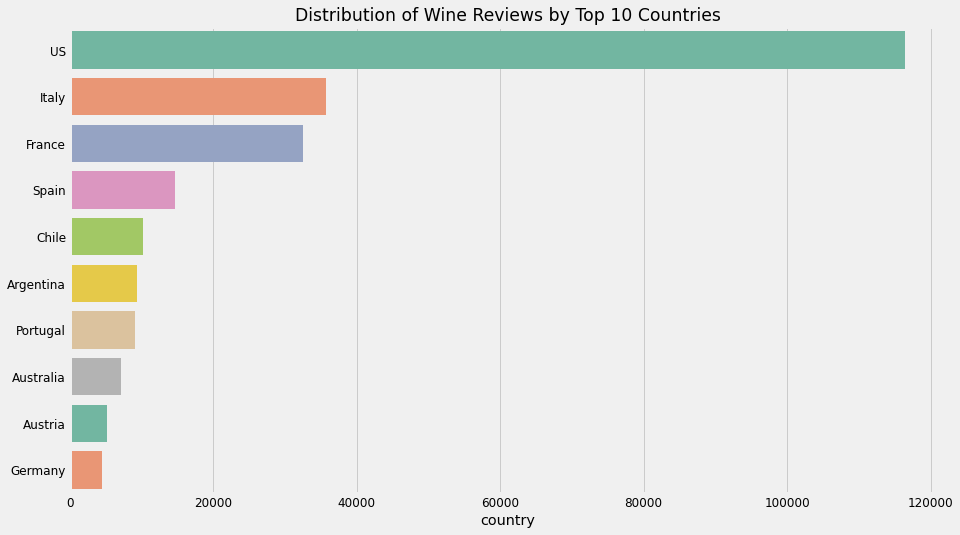

In [94]:
#print('Number of country list in data:',wine['country'].nunique())
plt.figure(figsize=(14,8))
cnt = wines['country'].value_counts().to_frame()[0:10]
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='Set2',orient='h')
plt.title('Distribution of Wine Reviews by Top 10 Countries');

### Distribution of wine price

Text(0.5, 1.0, 'Distribution of price')

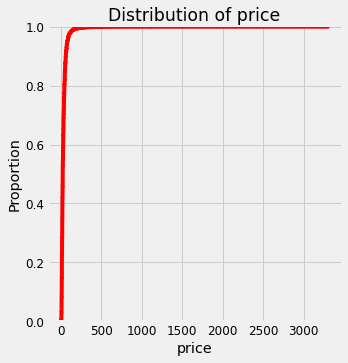

In [93]:
sns.displot(data = wines,color='r', x="price", kind="ecdf", height=8)
plt.title('Distribution of price')

Text(0.5, 1.0, 'Boxplot of price')

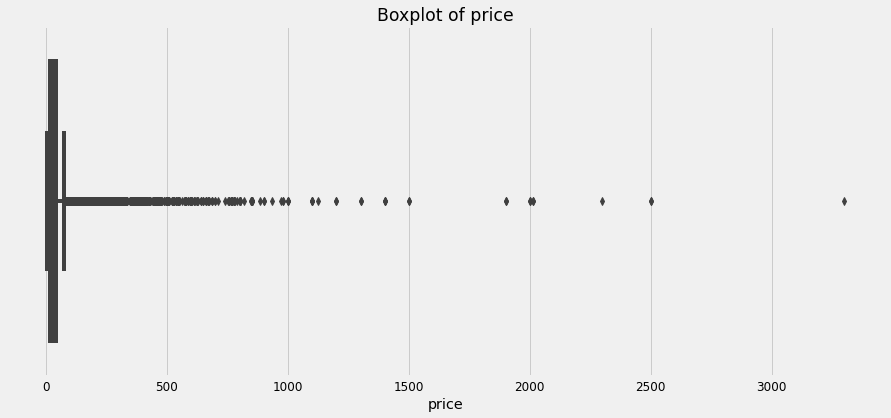

In [92]:
plt.figure(figsize=(14,6))
sns.boxplot(data=wines, x='price')
plt.title('Boxplot of price')

In [18]:
mean_price = 34.179725
std_price = 38.615971
wines['price'].describe()

count    258145.000000
mean         34.179725
std          38.615971
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64

In [19]:
good_price = mean_price + 2*std_price
good_price

111.411667

Text(0.5, 1.0, 'Distribution of price with the good price')

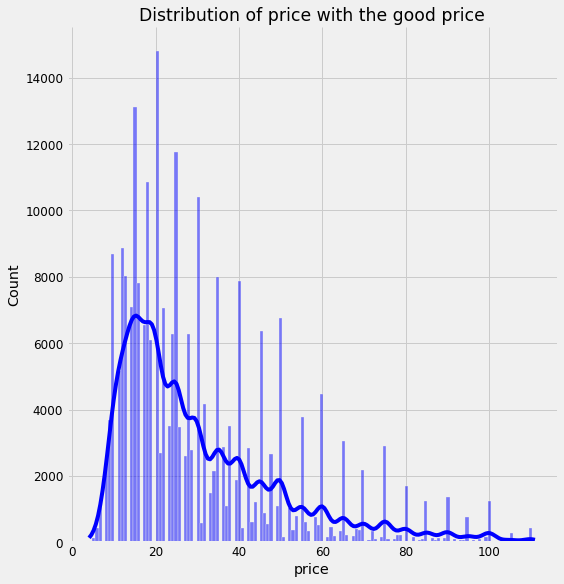

In [20]:
sns.displot(data = wines[wines['price']<good_price],color='b', x="price", kde=True, height=8)
plt.title('Distribution of price with the good price')

Text(0.5, 1.0, 'Distribution of points with the good price')

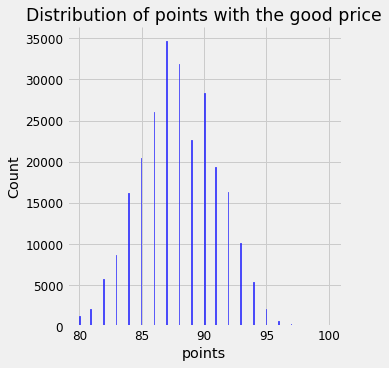

In [91]:
sns.displot(data = wines[wines['price']<good_price],color='b', x="points", height=5)
plt.title('Distribution of points with the good price')

Text(0.5, 1.0, 'Boxplot of price with the good price')

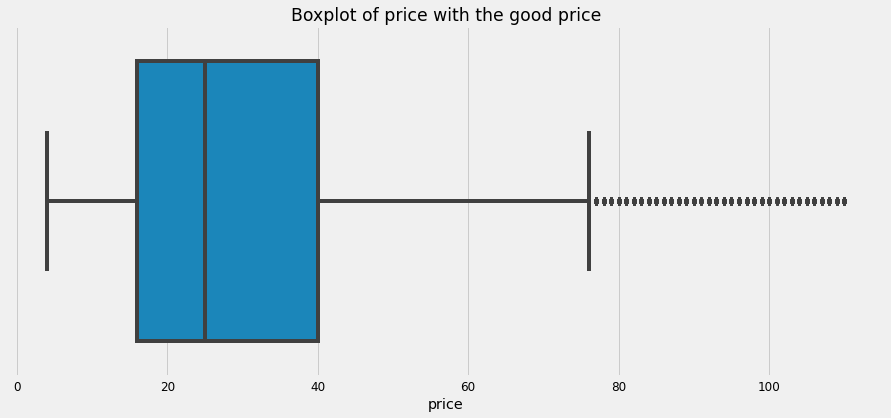

In [89]:
plt.figure(figsize=(14,6))
sns.boxplot(data=wines[wines['price']<111], x='price')
plt.title('Boxplot of price with the good price')

In [72]:
wines_good_price = wines[wines['price']<good_price].copy()

print('{}%'.format(round(wines_good_price.shape[0]/wines.shape[0]*100,2)))

97.75%


### Top 5 Wines??? 

#### Ordered by price with a point equal to or greater than 99 and with good price

In [90]:
top_10 = wines_good_price[wines_good_price['points'] >= 99].sort_values(by=['price'],ascending=True)
top_10[:5]

,Index_P,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,score
118059,118059,US,"Shows classic, full-throttle notes of tropical...",Estate Vineyard,99,44.0,California,Sonoma Coast,Sonoma,NaN,NaN,Failla 2010 Estate Vineyard Chardonnay (Sonoma...,Chardonnay,Failla,55.0
119196,119196,US,The only one of the Cayuse Syrahs that is co-f...,Cailloux Vineyard,99,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,NaN,NaN,NaN,Syrah,Cayuse,34.0
19354,19354,US,"In a stunning lineup of Cayuse Syrahs, the En ...",En Chamberlin Vineyard,100,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,NaN,NaN,NaN,Syrah,Cayuse,35.0
19356,19356,US,The only one of the Cayuse Syrahs that is co-f...,Cailloux Vineyard,99,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,NaN,NaN,NaN,Syrah,Cayuse,34.0
119194,119194,US,"In a stunning lineup of Cayuse Syrahs, the En ...",En Chamberlin Vineyard,100,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,NaN,NaN,NaN,Syrah,Cayuse,35.0


In [88]:
cnt = wines_good_price.groupby(['province','country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='points',ascending= False)[:15]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='Blues',high=0.5)

,province,country,points,count,min,max,mean
0,Oregon,US,100,3,65.000000,65.000000,65.000000
1,California,US,100,2,100.000000,100.000000,100.000000
2,Washington,US,100,2,80.000000,80.000000,80.000000
3,Oregon,US,99,6,65.000000,75.000000,70.000000
4,California,US,99,8,44.000000,100.000000,82.125000
5,Victoria,Australia,98,5,86.000000,97.000000,92.600000
6,Piedmont,Italy,98,3,60.000000,83.000000,71.000000
7,Bordeaux,France,98,2,70.000000,92.000000,81.000000
8,California,US,98,35,52.000000,110.000000,85.000000
9,Washington,US,98,6,50.000000,85.000000,65.833333


### Relation between Price and Points

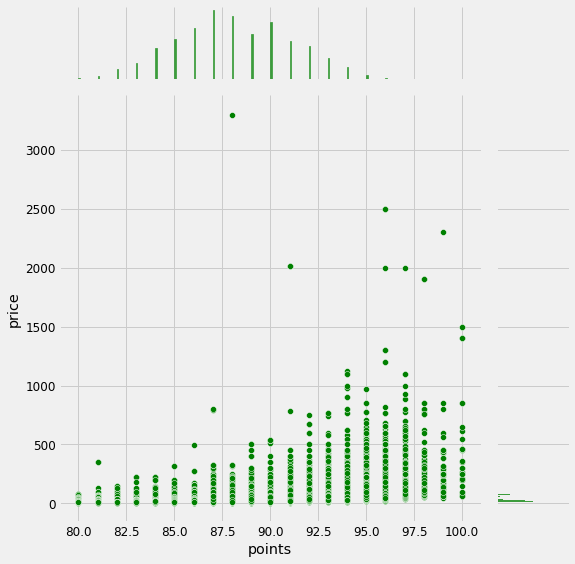

In [99]:
sns.jointplot( x = wines['points'],y = wines['price'],color='g', height=8);

### More expensive wine and cheaper wine by country

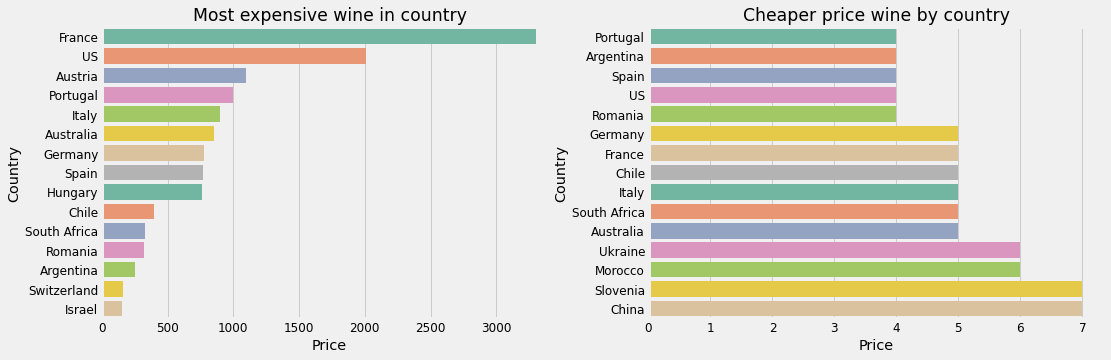

In [86]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
ax1,ax2 = ax.flatten()

cnt = wines.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'Set2',ax=ax1)
ax1.set_title('Most expensive wine in country')
ax1.set_ylabel('Country')
ax1.set_xlabel('Price')

cnt = wines.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'Set2',ax=ax2)
ax2.set_title('Cheaper price wine by country')
ax2.set_ylabel('Country')
ax2.set_xlabel('Price')

plt.subplots_adjust(wspace=0.2);

### Lowest and highest points by country

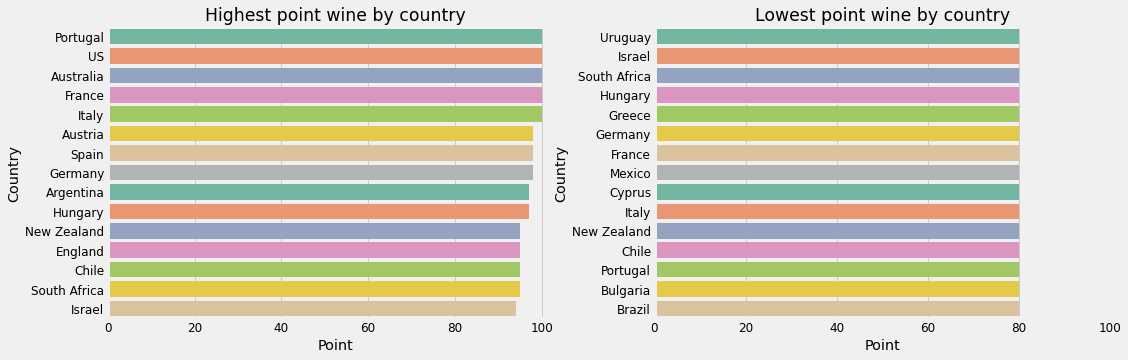

In [80]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
ax1,ax2 = ax.flatten()

cnt = wines.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'Set2',ax=ax1)
ax1.set_title('Highest point wine by country')
ax1.set_ylabel('Country')
ax1.set_xlabel('Point')

cnt = wines.groupby(['country'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'Set2',ax=ax2)
ax2.set_title('Lowest point wine by country')
ax2.set_xlim([0, 100])
ax2.set_ylabel('Country')
ax2.set_xlabel('Point')

plt.subplots_adjust(wspace=0.2);

# A score that considers price and score (points - price)

### With good prices

### Top 10 Wines??? 

In [103]:
wines_good_price['score'] = wines_good_price['points'] - wines_good_price['price']

wines_good_price.sort_values(by=['score'],ascending=False, inplace=True)
wines_good_price[:10]

,Index_P,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,score
15429,15429,US,"This Châteauneuf-style wine is jammy, with bla...",NaN,90,5.0,California,California,California Other,NaN,NaN,NaN,Syrah,Fusée,85.0
145389,145389,US,"This Châteauneuf-style wine is jammy, with bla...",NaN,90,5.0,California,California,California Other,NaN,NaN,NaN,Syrah,Fusée,85.0
34629,34629,Portugal,"Richly tannic, this concentrated wine has grea...",Toutalga,91,7.0,Alentejano,NaN,NaN,Roger Voss,@vossroger,Herdade dos Machados 2012 Toutalga Red (Alente...,Portuguese Red,Herdade dos Machados,84.0
15428,15428,US,The grapes for this impressive Aussie-style Sh...,NaN,90,6.0,California,California,California Other,NaN,NaN,NaN,Shiraz,Delicato,84.0
145388,145388,US,The grapes for this impressive Aussie-style Sh...,NaN,90,6.0,California,California,California Other,NaN,NaN,NaN,Shiraz,Delicato,84.0
143518,143518,Argentina,"What a score! Torrontès, a little-known Spanis...",NaN,90,7.0,Mendoza Province,Mendoza,NaN,NaN,NaN,NaN,Torrontés,Bodega Lurton,83.0
122325,122325,Portugal,"A darkly tannic wine, very mineral, tasting of...",Serrado Colheita,90,7.0,Dão,NaN,NaN,NaN,NaN,NaN,Portuguese Red,Quinta do Serrado,83.0
26101,26101,US,"With full ripeness, density and concentration,...",Winemaker's Select,91,8.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Snoqualmie 2006 Winemaker's Select Riesling (C...,Riesling,Snoqualmie,83.0
44445,44445,Portugal,"A darkly tannic wine, very mineral, tasting of...",Serrado Colheita,90,7.0,Dão,NaN,NaN,NaN,NaN,NaN,Portuguese Red,Quinta do Serrado,83.0
139283,139283,US,Yet another standout effort from this value pr...,NaN,90,7.0,Washington,Columbia Valley (WA),Columbia Valley,NaN,NaN,NaN,Gewürztraminer,Covey Run,83.0


### Use good price

Text(0.5, 1.0, 'Distribution of score')

<Figure size 1008x720 with 0 Axes>

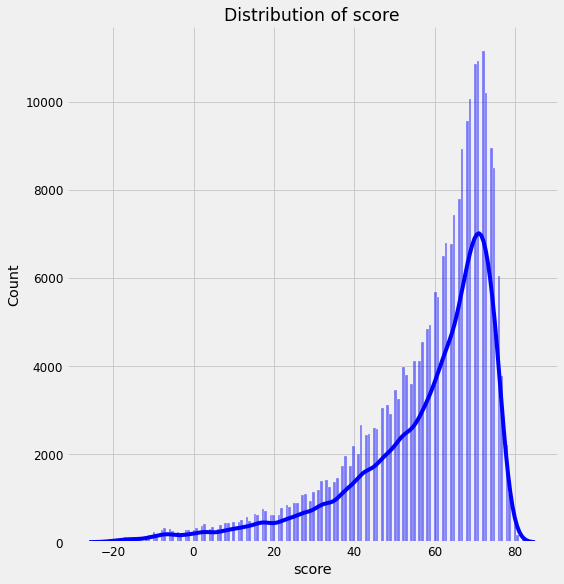

In [95]:
plt.figure(figsize=(14,10))
sns.displot(data = wines_good_price,color='b', x="score", kde=True, height=8)
plt.title('Distribution of score')

### Lowest and highest scores by country

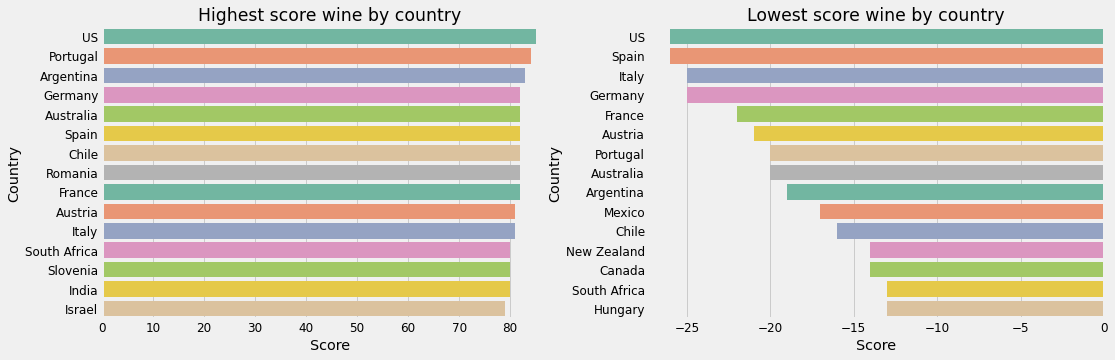

In [102]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
ax1,ax2 = ax.flatten()

cnt = wines_good_price.groupby(['country'])['score'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['score'], y = cnt.index, palette= 'Set2',ax=ax1)
ax1.set_title('Highest score wine by country')
ax1.set_ylabel('Country')
ax1.set_xlabel('Score')

cnt = wines_good_price.groupby(['country'])['score'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['score'], y = cnt.index, palette = 'Set2',ax=ax2)
ax2.set_title('Lowest score wine by country')
ax2.set_ylabel('Country')
ax2.set_xlabel('Score')

plt.subplots_adjust(wspace=0.2);

### My country is Brazil what will be the best wines in my country?

In [123]:
wines_good_price[wines_good_price['country'] == 'Brazil'][:5]

,Index_P,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,score
97572,97572,Brazil,Hot saucy plum and berry aromas set up an abra...,Agnus,86,12.0,Serra Gaúcha,NaN,NaN,Michael Schachner,@wineschach,Lidio Carraro 2014 Agnus Tannat (Serra Gaúcha),Tannat,Lidio Carraro,74.0
28028,28028,Brazil,Hot saucy plum and berry aromas set up an abra...,Agnus,86,12.0,Serra Gaúcha,NaN,NaN,Michael Schachner,@wineschach,Lidio Carraro 2014 Agnus Tannat (Serra Gaúcha),Tannat,Lidio Carraro,74.0
105381,105381,Brazil,A blend of 60% Cabernet Sauvignon and 40% Merl...,Cuvée Giuseppe,84,11.0,Vale dos Vinhedos,NaN,NaN,NaN,NaN,NaN,Cabernet Sauvignon-Merlot,Vinícola Miolo,73.0
46041,46041,Brazil,A blend of 60% Cabernet Sauvignon and 40% Merl...,Cuvée Giuseppe,84,11.0,Vale dos Vinhedos,NaN,NaN,NaN,NaN,NaN,Cabernet Sauvignon-Merlot,Vinícola Miolo,73.0
111301,111301,Brazil,This Brazilian Merlot smells rubbery and gaseo...,Agnus,85,12.0,Serra Gaúcha,NaN,NaN,Michael Schachner,@wineschach,Lidio Carraro 2014 Agnus Merlot (Serra Gaúcha),Merlot,Lidio Carraro,73.0


### and your country?

In [ ]:
wines_good_price[wines_good_price['country'] == '?????'][:5]

# Analyzing wines by continents

In [133]:
country_code = pc.country_name_to_country_alpha2("Brazil", cn_name_format="default")
print(country_code)
continent_name = pc.country_alpha2_to_continent_code(country_code)
print(continent_name)

BR
SA


In [267]:
list_countries = wines_good_price['country'].unique()

def get_continent(col):
    try:
        cn_a2_code =  pc.country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = pc.country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return [col, cn_continent]

continents = [get_continent(c) for c in list_countries]
continents_mapping = {}

for i in continents:
    for x in (i,2):
        if(type(x) == list):
            continents_mapping[x[0]] = x[1]

continents_mapping

{'US': 'Unknown',
 'Portugal': 'EU',
 'Argentina': 'SA',
 'Spain': 'EU',
 'Germany': 'EU',
 'Romania': 'EU',
 'Chile': 'SA',
 'Australia': 'OC',
 'France': 'EU',
 'Italy': 'EU',
 'Austria': 'EU',
 'South Africa': 'AF',
 'Slovenia': 'EU',
 'India': 'AS',
 'Bulgaria': 'EU',
 'Moldova': 'EU',
 'Israel': 'AS',
 'Greece': 'EU',
 'Ukraine': 'EU',
 'New Zealand': 'OC',
 'Georgia': 'AS',
 'Hungary': 'EU',
 'Morocco': 'AF',
 'Canada': 'NA',
 'Uruguay': 'SA',
 'Lebanon': 'AS',
 'Macedonia': 'EU',
 'Bosnia and Herzegovina': 'EU',
 'Cyprus': 'AS',
 'Croatia': 'EU',
 'Lithuania': 'EU',
 'Turkey': 'AS',
 'Mexico': 'NA',
 'China': 'AS',
 'Brazil': 'SA',
 'Armenia': 'AS',
 'Peru': 'SA',
 'Luxembourg': 'EU',
 'Czech Republic': 'EU',
 'Montenegro': 'EU',
 'Slovakia': 'EU',
 'Serbia': 'EU',
 'South Korea': 'AS',
 'Switzerland': 'EU',
 'Albania': 'EU',
 'England': 'Unknown',
 'Japan': 'AS',
 'US-France': 'Unknown'}

In [270]:
continents_mapping['US'] = 'NA'
continents_mapping['England'] = 'EU'
continents_mapping['US-France'] = 'NA'
continents_mapping

{'US': 'NA',
 'Portugal': 'EU',
 'Argentina': 'SA',
 'Spain': 'EU',
 'Germany': 'EU',
 'Romania': 'EU',
 'Chile': 'SA',
 'Australia': 'OC',
 'France': 'EU',
 'Italy': 'EU',
 'Austria': 'EU',
 'South Africa': 'AF',
 'Slovenia': 'EU',
 'India': 'AS',
 'Bulgaria': 'EU',
 'Moldova': 'EU',
 'Israel': 'AS',
 'Greece': 'EU',
 'Ukraine': 'EU',
 'New Zealand': 'OC',
 'Georgia': 'AS',
 'Hungary': 'EU',
 'Morocco': 'AF',
 'Canada': 'NA',
 'Uruguay': 'SA',
 'Lebanon': 'AS',
 'Macedonia': 'EU',
 'Bosnia and Herzegovina': 'EU',
 'Cyprus': 'AS',
 'Croatia': 'EU',
 'Lithuania': 'EU',
 'Turkey': 'AS',
 'Mexico': 'NA',
 'China': 'AS',
 'Brazil': 'SA',
 'Armenia': 'AS',
 'Peru': 'SA',
 'Luxembourg': 'EU',
 'Czech Republic': 'EU',
 'Montenegro': 'EU',
 'Slovakia': 'EU',
 'Serbia': 'EU',
 'South Korea': 'AS',
 'Switzerland': 'EU',
 'Albania': 'EU',
 'England': 'EU',
 'Japan': 'AS',
 'US-France': 'NA'}

In [294]:
wines_good_price['continent'] =  [continents_mapping[x] for x in wines_good_price['country']]
wines['continent'] =  [continents_mapping[x] for x in wines['country']]
wines_good_price.head(5)

,Index_P,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,score,continent
15429,15429,US,"This Châteauneuf-style wine is jammy, with bla...",NaN,90,5.0,California,California,California Other,NaN,NaN,NaN,Syrah,Fusée,85.0,NA
145389,145389,US,"This Châteauneuf-style wine is jammy, with bla...",NaN,90,5.0,California,California,California Other,NaN,NaN,NaN,Syrah,Fusée,85.0,NA
34629,34629,Portugal,"Richly tannic, this concentrated wine has grea...",Toutalga,91,7.0,Alentejano,NaN,NaN,Roger Voss,@vossroger,Herdade dos Machados 2012 Toutalga Red (Alente...,Portuguese Red,Herdade dos Machados,84.0,EU
15428,15428,US,The grapes for this impressive Aussie-style Sh...,NaN,90,6.0,California,California,California Other,NaN,NaN,NaN,Shiraz,Delicato,84.0,NA
145388,145388,US,The grapes for this impressive Aussie-style Sh...,NaN,90,6.0,California,California,California Other,NaN,NaN,NaN,Shiraz,Delicato,84.0,NA


### Best wines in south america

In [288]:
wines_good_price[wines_good_price['continent'] == 'SA'][:5]

,Index_P,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,score,continent
143518,143518,Argentina,"What a score! Torrontès, a little-known Spanis...",NaN,90,7.0,Mendoza Province,Mendoza,NaN,NaN,NaN,NaN,Torrontés,Bodega Lurton,83.0,SA
24592,24592,Chile,More than decent; this is good SB with no bell...,Reserva,87,5.0,Aconcagua Valley,NaN,NaN,Michael Schachner,@wineschach,In Situ 2008 Reserva Sauvignon Blanc (Aconcagu...,Sauvignon Blanc,In Situ,82.0,SA
62072,62072,Chile,More than decent; this is good SB with no bell...,Reserva,87,5.0,Aconcagua Valley,NaN,NaN,Michael Schachner,@wineschach,In Situ 2008 Reserva Sauvignon Blanc (Aconcagu...,Sauvignon Blanc,In Situ,82.0,SA
114104,114104,Chile,Named after the matriarch of the De Martino fa...,Legado de Armida Reserva,88,6.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Santa Ines 2000 Legado de Armida Reserva Chard...,Chardonnay,Santa Ines,82.0,SA
132361,132361,Argentina,"Every llama has its day, and for Funky Llama t...",NaN,87,6.0,Mendoza Province,Mendoza,NaN,NaN,NaN,NaN,Cabernet Sauvignon,Funky Llama,81.0,SA


### More expensive wine and cheaper wine by continent

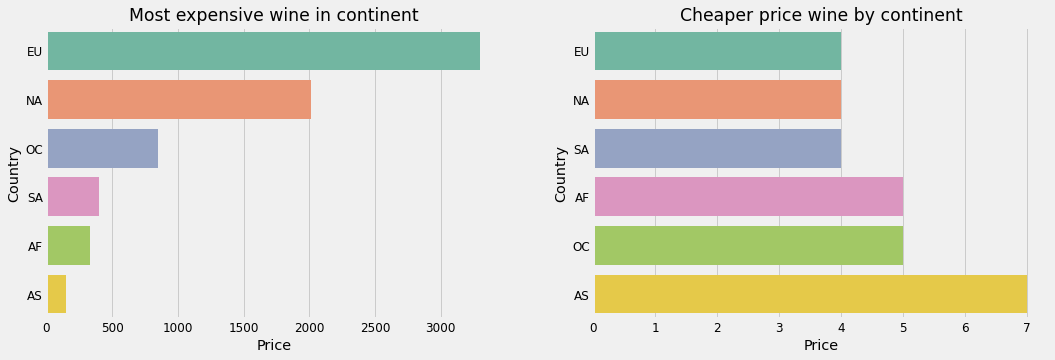

In [299]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
ax1,ax2 = ax.flatten()

cnt = wines.groupby(['continent'])['price'].max().sort_values(ascending=False).to_frame()
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'Set2',ax=ax1)
ax1.set_title('Most expensive wine in continent')
ax1.set_ylabel('Country')
ax1.set_xlabel('Price')

cnt = wines.groupby(['continent'])['price'].min().sort_values(ascending=True).to_frame()
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'Set2',ax=ax2)
ax2.set_title('Cheaper price wine by continent')
ax2.set_ylabel('Country')
ax2.set_xlabel('Price')

plt.subplots_adjust(wspace=0.2);